In [28]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [4]:
type(data)

sklearn.utils.Bunch

In [5]:
x = data.data
y = data.target

In [6]:
type(x)

numpy.ndarray

In [7]:
print(x.shape)
print(y.shape)

(569, 30)
(569,)


In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=101)

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(398, 30)
(398,)
(171, 30)
(171,)


In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 3000)

lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))

Accuracy:  0.9415204678362573
Precision:  0.9357798165137615
Recall:  0.9714285714285714


In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

print(cm)

[[ 59   7]
 [  3 102]]


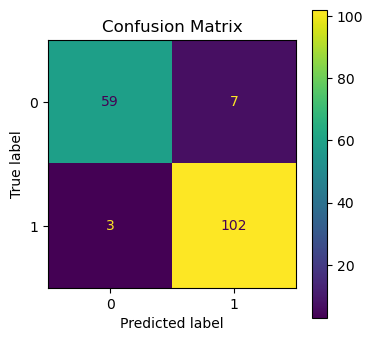

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = lr.classes_)

fig,ax = plt.subplots(figsize = (4,4))
ax.set_title('Confusion Matrix')
disp.plot(ax = ax)
plt.show()

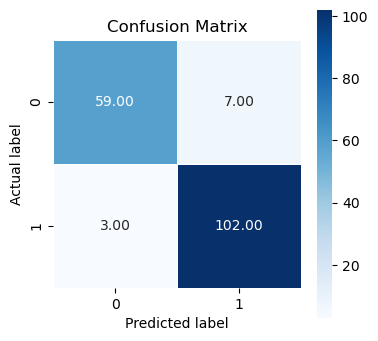

In [20]:
plt.figure(figsize = (4,4))

sns.heatmap(cm,annot= True,fmt='.2f',linewidth = 0.5,square=True, cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

plt.show()

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred,labels = lr.classes_.tolist()))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        66
           1       0.94      0.97      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



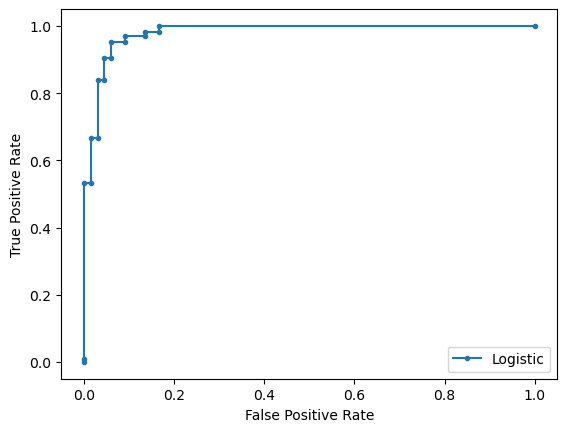

In [23]:
from sklearn.metrics import roc_curve,roc_auc_score

lr_probs = lr.predict_proba(x_test)

lr_fpr,lr_tpr,_ = roc_curve(y_test,lr_probs[:,1])

plt.plot(lr_fpr,lr_tpr,marker='.',label='Logistic')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

In [25]:
lr_auc = roc_auc_score(y_test,lr_probs[:,1])

print("AUC: ",lr_auc)

AUC:  0.9806637806637807


In [29]:
from sklearn.datasets import fetch_openml
X,y = fetch_openml('mnist_784',version=1,return_X_y = True)

In [30]:
type(X)

pandas.core.frame.DataFrame

In [31]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [32]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 1/7,random_state=101)

In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


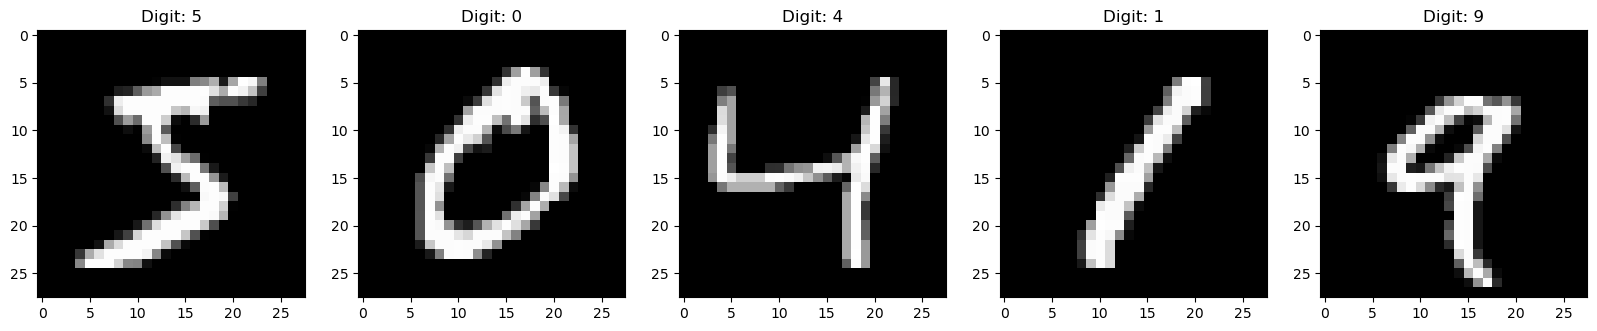

In [36]:
plt.figure(figsize=(20,4))

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X.to_numpy()[i].reshape(28,28),cmap=plt.cm.gray)
    plt.title('Digit: %i'%int(y.to_numpy()[i]))

In [37]:
type(x_train)

pandas.core.frame.DataFrame

In [38]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

In [39]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [40]:
x_train = x_train/255
x_test = x_test/255

In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 3000)

lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

In [43]:
type(y_pred)

numpy.ndarray

In [65]:
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.9233


In [68]:
acc = lr.score(x_test,y_test)
print("Accuracy: ",acc)

Accuracy:  0.9233


In [66]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

print(cm)

[[ 974    1    4    5    3    5    9    1    5    1]
 [   0 1069    4    6    1    7    1    1    5    3]
 [   6   12  892   18   10    3    7   17   24    0]
 [   6    8   22  935    1   32    3   12   15   12]
 [   1    7    5    3  886    1    9    5   10   33]
 [   9    6    6   37    7  798   25    4   17    4]
 [   9    3   11    0    8   16  954    1    3    0]
 [   3    1   10    3    9    2    0 1001    2   37]
 [   3   15   14   21    5   26   11    2  834    9]
 [   2    6    1   10   22    3    0   33    7  890]]


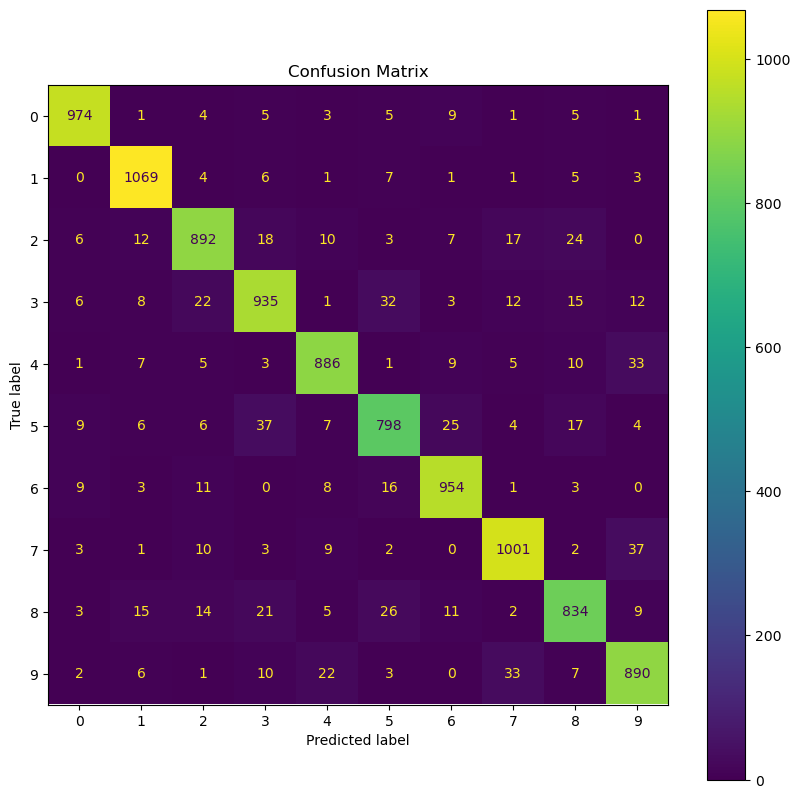

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = lr.classes_)

fig,ax = plt.subplots(figsize = (10,10))
ax.set_title('Confusion Matrix')
disp.plot(ax = ax)
plt.show()

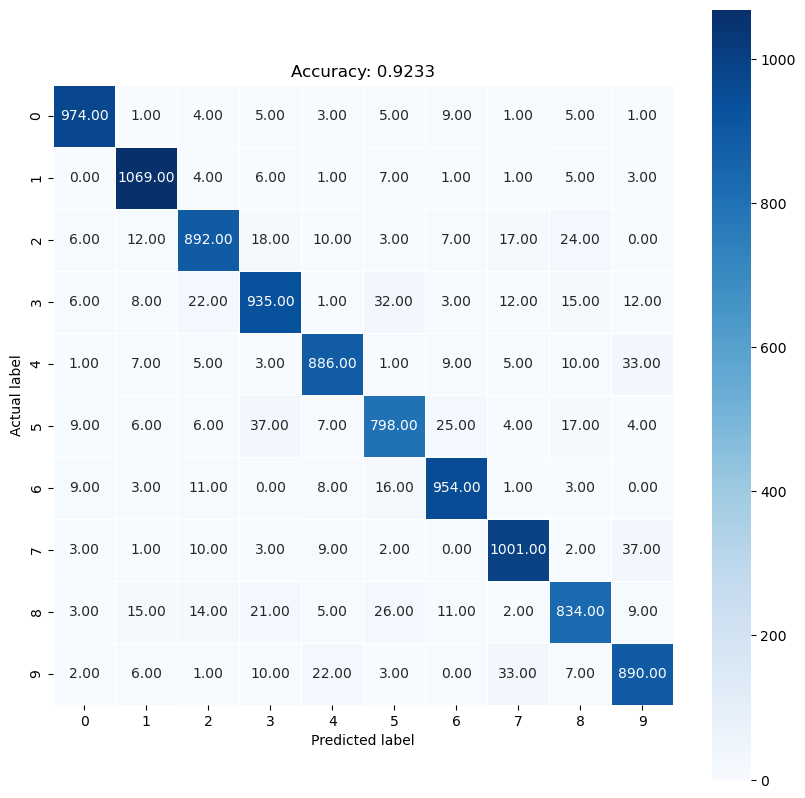

In [72]:
plt.figure(figsize = (10,10))

sns.heatmap(cm,annot= True,fmt='.2f',linewidth = 0.5,square=True, cmap='Blues')

plt.title('Accuracy: {}'.format(acc))
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

plt.show()

In [70]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred,labels = lr.classes_.tolist()))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1008
           1       0.95      0.97      0.96      1097
           2       0.92      0.90      0.91       989
           3       0.90      0.89      0.90      1046
           4       0.93      0.92      0.93       960
           5       0.89      0.87      0.88       913
           6       0.94      0.95      0.94      1005
           7       0.93      0.94      0.93      1068
           8       0.90      0.89      0.90       940
           9       0.90      0.91      0.91       974

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

